In [2]:
import numpy as np
from astropy.io import fits
import astropy.io.fits as pyfits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from astropy.table import Table
import pandas as pd
import math
import random as r
import scipy.stats
import os
import matplotlib.patches as mpatches
from astropy.io import fits
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
from sklearn.neighbors import KernelDensity

In [3]:
sources = pd.read_csv('/home/machado.35/projects/intro/scripts/sources.csv')
sources = list(sources['sources'])

res_list = [60,90,120,150]
fp = '/data/rubin/machado.35/phangs/rand_results/1e6/'


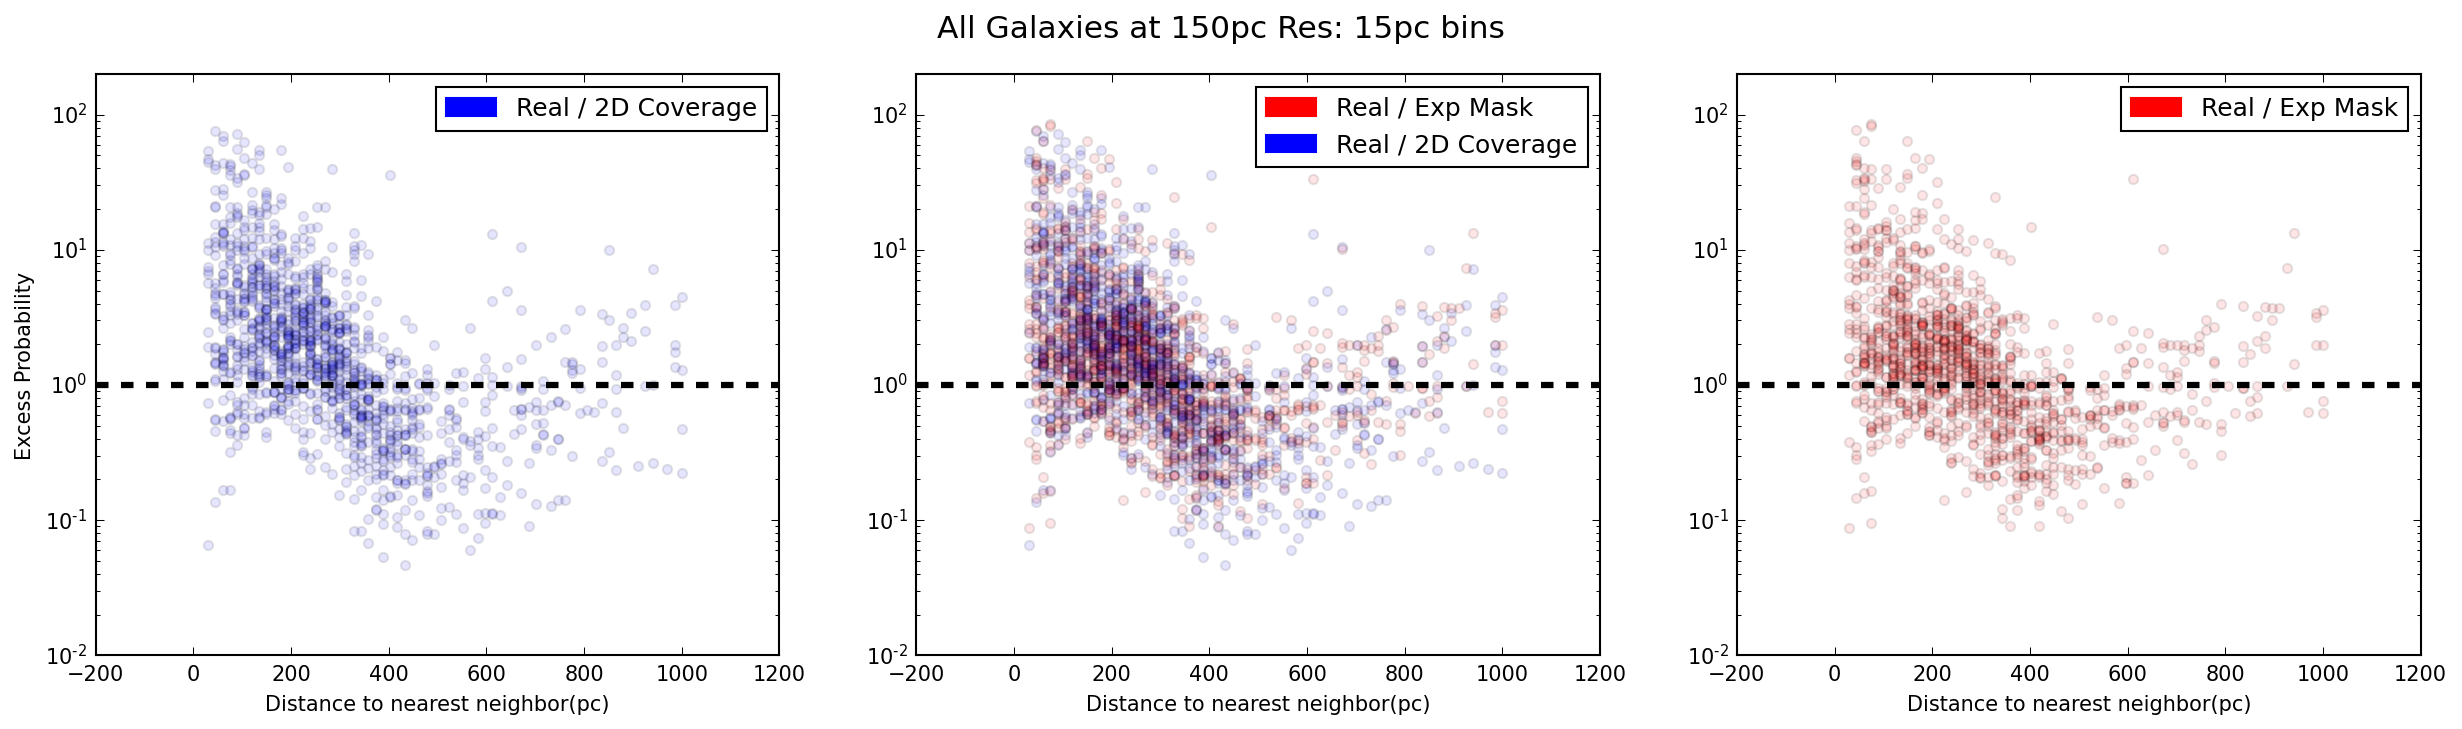

In [96]:
np.min()

In [39]:
np.where(np.array(sources) == 'ngc2835')

(array([23]),)

In [29]:
sources[62]

'ngc5643'

## Example Plots 

In [13]:
#source ngc6300
i = 63
res = 60
cov_mask = '/home/machado.35/projects/masks/coverage/'+sources[i]+'_12m+7m+tp_co21_'+str(res)+'pc_coverage2d.fits'
exp_mask = '/home/machado.35/projects/masks/exp/'+sources[i]+'_'+str(res)+'pc_exp_mask.fits'
cov_mask = fits.open(cov_mask)
exp_mask = fits.open(exp_mask)
bins = np.linspace(0,1000,51)
data = '/home/machado.35/projects/intro/sources/'+sources[i]+'/'+sources[i]+'_'+str(res)+'pc_cloud_stats.csv'
cat_2d_fp = fp+sources[i]+'_1e3_2dcov_'+str(res)+'pc.csv'
cat_2d = pd.read_csv(fp+sources[i]+'_1e3_2dcov_'+str(res)+'pc.csv')
cat_exp = pd.read_csv(fp+sources[i]+'_1e3_exp_'+str(res)+'pc.csv')
data = pd.read_csv(data)
col_2d = list(cat_2d.columns)
col_exp = list(cat_exp.columns)
real_dist = data['min_dist']
exp_dist = []
cov_dist = []
loc_2d = []
loc_exp = []
for k in range(len(col_2d)):
    loc_2d.append(col_2d[k].endswith('first'))
for k in range(len(col_exp)):
    loc_exp.append(col_exp[k].endswith('first'))
exp_first = cat_exp.iloc[:,loc_exp]
cov_first = cat_2d.iloc[:,loc_2d]
for j in range(len(exp_first.columns)):
    exp_dist.extend(exp_first.iloc[:,j].tolist())
for j in range(len(cov_first.columns)):
    cov_dist.extend(cov_first.iloc[:,j].tolist())
true = np.histogram(real_dist, bins=bins, normed=True)
rand_cov = np.histogram(cov_dist, bins=bins, normed=True)
rand_exp = np.histogram(exp_dist, bins=bins, normed=True)
excess_cov = true[0]/rand_cov[0]
excess_exp = true[0]/rand_exp[0]
#remove nan and inf
bad_vals_exp = np.where(np.isfinite(excess_exp) == False)
bad_vals_cov = np.where(np.isfinite(excess_cov) == False)
excess_exp[bad_vals_exp] = 0
excess_cov[bad_vals_cov] = 0
zeros_exp = np.where(excess_exp == 0)
zeros_cov = np.where(excess_cov == 0)
excess_exp[zeros_exp] = 0.001
excess_cov[zeros_cov] = 0.001

Text(0.5, 0, 'Distance to Nearest Neighbor')

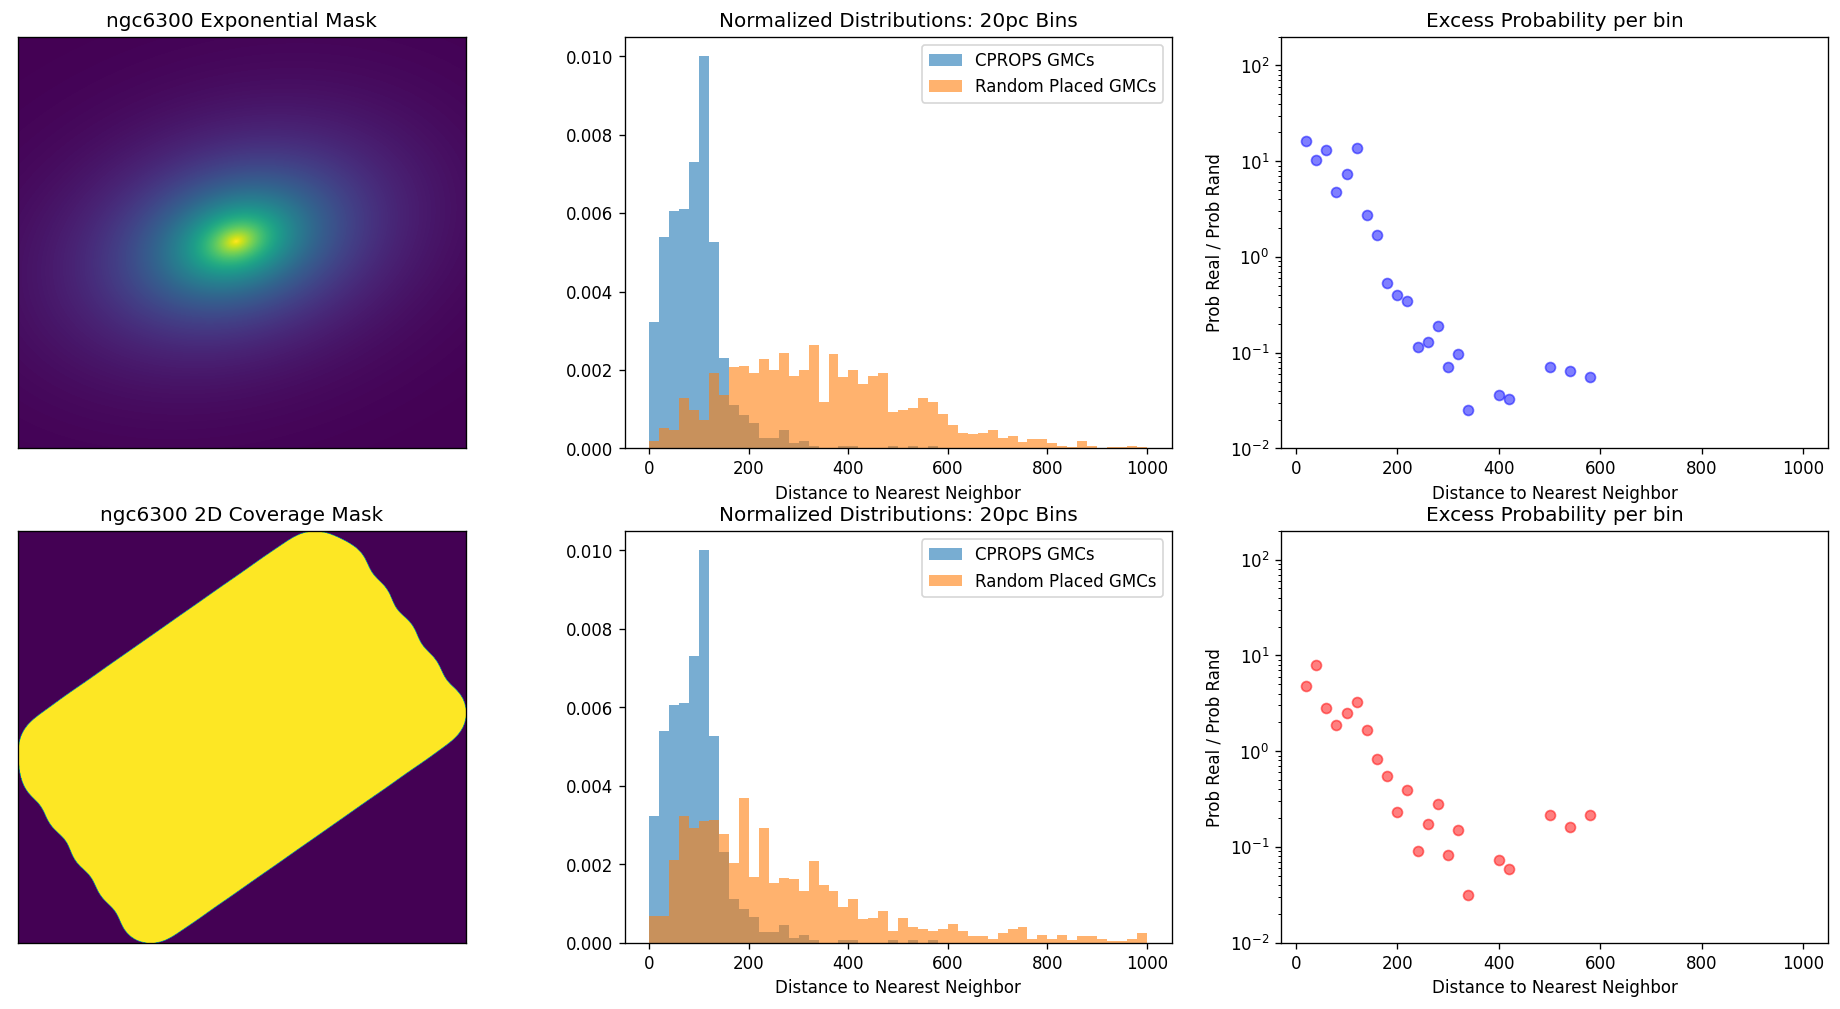

In [15]:
fig, ax = plt.subplots(2,3, figsize=(20,10), dpi=120)
ax[0,0].imshow(exp_mask[0].data, origin='lower')
ax[0,0].xaxis.set_visible(False)
ax[0,0].yaxis.set_visible(False)
ax[0,0].title.set_text(sources[i]+' Exponential Mask')
ax[0,1].title.set_text('Normalized Distributions: 20pc Bins')
ax[0,1].hist(real_dist, bins=bins, density=True, histtype='stepfilled', alpha = 0.6, label='CPROPS GMCs')
ax[0,1].hist(cov_dist, bins=bins, density=True, histtype='stepfilled', alpha = 0.6, label='Random Placed GMCs')
ax[0,1].set_xlabel('Distance to Nearest Neighbor')
ax[0,1].legend()
ax[0,2].title.set_text('Excess Probability per bin')
ax[0,2].scatter(bins[1:], excess_cov, c='b', alpha=0.5, label='Real / 2D Coverage')
ax[0,2].set_yscale('log')
ax[0,2].set_ylim(0.01,200)
ax[0,2].set_ylabel('Prob Real / Prob Rand')
ax[0,2].set_xlabel('Distance to Nearest Neighbor')

ax[1,0].imshow(cov_mask[0].data, origin='lower')
ax[1,0].xaxis.set_visible(False)
ax[1,0].yaxis.set_visible(False)
ax[1,0].title.set_text(sources[i]+' 2D Coverage Mask')
ax[1,1].title.set_text('Normalized Distributions: 20pc Bins')
ax[1,1].hist(real_dist, bins=bins, density=True, histtype='stepfilled', alpha = 0.6, label='CPROPS GMCs')
ax[1,1].hist(exp_dist, bins=bins, density=True, histtype='stepfilled', alpha = 0.6, label='Random Placed GMCs')
ax[1,1].set_xlabel('Distance to Nearest Neighbor')
ax[1,1].legend()
ax[1,2].title.set_text('Excess Probability per bin')
ax[1,2].scatter(bins[1:], excess_exp, c='r', alpha=0.5, label='Real / 2D Coverage')
ax[1,2].set_yscale('log')
ax[1,2].set_ylim(0.01,200)
ax[1,2].set_ylabel('Prob Real / Prob Rand')
ax[1,2].set_xlabel('Distance to Nearest Neighbor')
plt.savefig()

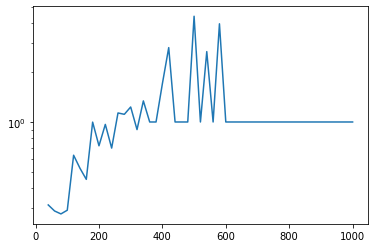

In [21]:
plt.plot(bins[2:], excess_cov[1:]/excess_exp[1:])
plt.yscale('log')

In [20]:
excess_cov[1]

6.44778947368421

ValueError: setting an array element with a sequence.

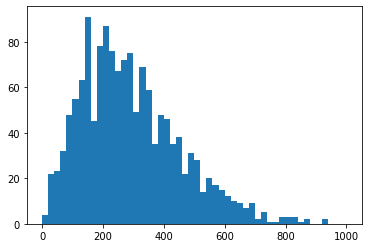

In [33]:
plt.hist(exp_dist, bins=bins)
# Gaussian KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(rand_exp)
#log_dens = kde.score_samples(X_plot)
#ax[1, 1].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
#ax[1, 1].text(-3.5, 0.31, "Gaussian Kernel Density")

In [ ]:
#Table info
num = [len(true_first), len(rand_first)]
mean = np.around([np.mean(true_first), np.mean(rand_first)])
median = np.around([np.median(true_first),np.median(rand_first)])
perc_16 = np.around([np.percentile(true_first,16),np.percentile(rand_first, 16)])
perc_84 = np.around([np.percentile(true_first,84),np.percentile(rand_first, 84)])
rows = ['Num', 'Mean', 'Median', '16th Percentile', '84th Percentile']
columns = ['CPROPS GMCs', 'Random Placement']
cell_text = [num,mean,median,perc_16,perc_84]




plt.figure(figsize=(8,5), dpi = 100)
plt.hist(true_first, bins=bins, density=True, histtype='stepfilled', alpha = 0.6, label='CPROPS GMCs')
plt.hist(rand_first, bins=bins, density=True, histtype='stepfilled', alpha=0.6, label='Random Placement')
plt.legend()
plt.xlabel('Nearest Neighbor Separation (pc)', fontsize=12)
table = plt.table(cellText=cell_text, rowLabels=rows, colLabels=columns, loc='bottom left', bbox=[0.15, -0.6, 0.85, 0.4])
plt.title('NGC6300 at 150pc Resolution', fontsize=15)
table.set_fontsize(14)
#plt.savefig('/Users/josh/projects/phangs_first_year_paper/fig/ngc6300_100k_rand_hist.pdf', bbox_inches="tight", pad_inches=0.25)

# GMC CDF's via Histogram

In [86]:
sources = pd.read_csv('/home/machado.35/projects/intro/scripts/sources.csv')
sources = list(sources['sources'])

res_list = [60,90,120,150]
fp = '/data/rubin/machado.35/phangs/rand_results/'

Text(0, 0.5, 'Probability')

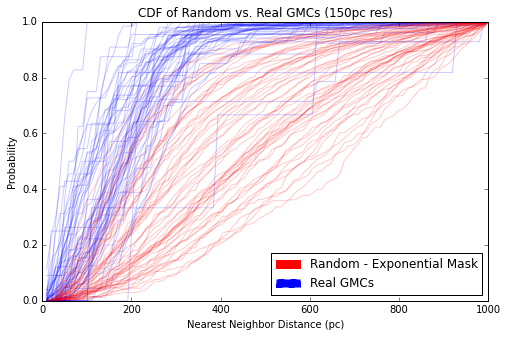

In [104]:
# defining the libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
%matplotlib inline 
plt.figure(figsize=(8,5))
bins = np.linspace(0,1000,100)
res = 150
#sources = ['ngc6300']
for i in range(len(sources)):
    loc = []
    data = '/home/machado.35/projects/intro/sources/'+sources[i]+'/'+sources[i]+'_'+str(res)+'pc_cloud_stats.csv'
    if os.path.isfile(data):
        cat_2d_fp = fp+sources[i]+'_1e3_2dcov_'+str(res)+'pc.csv'
        if os.path.isfile(cat_2d_fp):
            cat_2d = pd.read_csv(fp+sources[i]+'_1e3_2dcov_'+str(res)+'pc.csv')
            cat_exp = pd.read_csv(fp+sources[i]+'_1e3_exp_'+str(res)+'pc.csv')
            real_data = pd.read_csv(data)
            col_2d = list(cat_2d.columns)
            col_exp = list(cat_exp.columns)
            real_dist = real_data['min_dist']
            exp_dist = []
            cov_dist = []
            loc_2d = []
            loc_exp = []
            for k in range(len(col_2d)):
                loc_2d.append(col_2d[k].endswith('first'))
            for k in range(len(col_exp)):
                loc_exp.append(col_exp[k].endswith('first'))
            exp_first = cat_exp.iloc[:,loc_exp]
            cov_first = cat_2d.iloc[:,loc_2d]
            for j in range(len(exp_first.columns)):
                exp_dist.extend(exp_first.iloc[:,j].tolist())
            for j in range(len(cov_first.columns)):
                cov_dist.extend(cov_first.iloc[:,j].tolist())
            true = np.histogram(real_dist, bins=bins, normed=True)
            rand_cov = np.histogram(cov_dist, bins=bins, normed=True)
            rand_exp = np.histogram(exp_dist, bins=bins, normed=True)
            excess_cov = true[0]/rand_cov[0]
            excess_exp = true[0]/rand_exp[0]
            #remove nan and inf
            bad_vals_exp = np.where(np.isfinite(excess_exp) == False)
            bad_vals_cov = np.where(np.isfinite(excess_cov) == False)
            excess_exp[bad_vals_exp] = 0
            excess_cov[bad_vals_cov] = 0
            zeros_exp = np.where(excess_exp == 0)
            zeros_cov = np.where(excess_cov == 0)
            excess_exp[zeros_exp] = 0.001
            excess_cov[zeros_cov] = 0.001
            
            
            exp_data = exp_dist
            exp_count, bins_count = np.histogram(exp_data, bins=bins) 
            exp_pdf = exp_count / sum(exp_count)
            exp_cdf = np.cumsum(exp_pdf)
            plt.plot(bins_count[1:], exp_cdf, c='r', alpha=0.2) 
            
            real_data = real_dist
            real_count, bins_count = np.histogram(real_data, bins=bins) 
            real_pdf = real_count / sum(real_count)
            real_cdf = np.cumsum(real_pdf)
            plt.plot(bins_count[1:], real_cdf, c='b', alpha=0.2) 
            
            cov_data = cov_dist
            cov_count, bins_count = np.histogram(cov_data, bins=bins) 
            cov_pdf = cov_count / sum(cov_count)
            cov_cdf = np.cumsum(cov_pdf)
            #plt.plot(bins_count[1:], cov_cdf, c='g', alpha=0.2) 
            
            
#data = exp_dist
  
# getting data of the histogram 
#count, bins_count = np.histogram(data, bins=bins) 
  
# finding the PDF of the histogram using count values 
#pdf = count / sum(count) 
  
# using numpy np.cumsum to calculate the CDF 
# We can also find using the PDF values by looping and adding 
#cdf = np.cumsum(pdf) 
  
# plotting PDF and CDF 
#plt.plot(bins_count[1:], pdf, color="red", label="PDF") 
#plt.plot(bins_count[1:], cdf, label="Random - Exponential") 

red_patch = mpatches.Patch(color='red', label='Random - Exponential Mask')
blue_patch = mpatches.Patch(color='blue', label='Real GMCs', ls='--', facecolor=None)
plt.legend(handles=[red_patch, blue_patch], loc='lower right')
plt.title('CDF of Random vs. Real GMCs ('+str(res)+'pc res)')
plt.xlabel('Nearest Neighbor Distance (pc)')
plt.ylabel('Probability')

# GMC PDF's via Histogram

Text(0, 0.5, 'Probability')

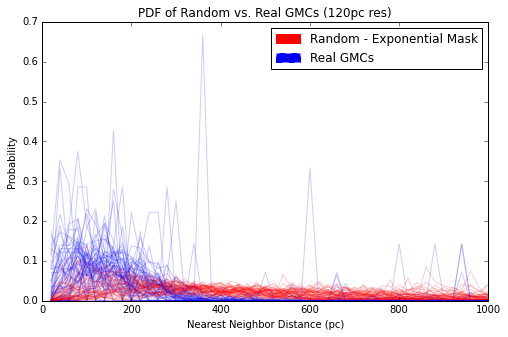

In [88]:
# defining the libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
%matplotlib inline 
plt.figure(figsize=(8,5))
bins = np.linspace(0,1000,51)
res = 120
for i in range(len(sources)):
    loc = []
    data = '/home/machado.35/projects/intro/sources/'+sources[i]+'/'+sources[i]+'_'+str(res)+'pc_cloud_stats.csv'
    if os.path.isfile(data):
        cat_2d_fp = fp+sources[i]+'_1e3_2dcov_'+str(res)+'pc.csv'
        if os.path.isfile(cat_2d_fp):
            cat_2d = pd.read_csv(fp+sources[i]+'_1e3_2dcov_'+str(res)+'pc.csv')
            cat_exp = pd.read_csv(fp+sources[i]+'_1e3_exp_'+str(res)+'pc.csv')
            real_data = pd.read_csv(data)
            col_2d = list(cat_2d.columns)
            col_exp = list(cat_exp.columns)
            real_dist = real_data['min_dist']
            exp_dist = []
            cov_dist = []
            loc_2d = []
            loc_exp = []
            for k in range(len(col_2d)):
                loc_2d.append(col_2d[k].endswith('first'))
            for k in range(len(col_exp)):
                loc_exp.append(col_exp[k].endswith('first'))
            exp_first = cat_exp.iloc[:,loc_exp]
            cov_first = cat_2d.iloc[:,loc_2d]
            for j in range(len(exp_first.columns)):
                exp_dist.extend(exp_first.iloc[:,j].tolist())
            for j in range(len(cov_first.columns)):
                cov_dist.extend(cov_first.iloc[:,j].tolist())
            true = np.histogram(real_dist, bins=bins, normed=True)
            rand_cov = np.histogram(cov_dist, bins=bins, normed=True)
            rand_exp = np.histogram(exp_dist, bins=bins, normed=True)
            excess_cov = true[0]/rand_cov[0]
            excess_exp = true[0]/rand_exp[0]
            #remove nan and inf
            bad_vals_exp = np.where(np.isfinite(excess_exp) == False)
            bad_vals_cov = np.where(np.isfinite(excess_cov) == False)
            excess_exp[bad_vals_exp] = 0
            excess_cov[bad_vals_cov] = 0
            zeros_exp = np.where(excess_exp == 0)
            zeros_cov = np.where(excess_cov == 0)
            excess_exp[zeros_exp] = 0.001
            excess_cov[zeros_cov] = 0.001
            
            
            exp_data = exp_dist
            exp_count, bins_count = np.histogram(exp_data, bins=bins) 
            exp_pdf = exp_count / sum(exp_count)
            exp_cdf = np.cumsum(exp_pdf)
            plt.plot(bins_count[1:], exp_pdf, c='r', alpha=0.2) 
            
            real_data = real_dist
            real_count, bins_count = np.histogram(real_data, bins=bins) 
            real_pdf = real_count / sum(real_count)
            real_cdf = np.cumsum(real_pdf)
            plt.plot(bins_count[1:], real_pdf, c='b', alpha=0.2) 
            
            cov_data = cov_dist
            cov_count, bins_count = np.histogram(cov_data, bins=bins) 
            cov_pdf = cov_count / sum(cov_count)
            cov_cdf = np.cumsum(cov_pdf)
            #plt.plot(bins_count[1:], cov_cdf, c='g', alpha=0.2) 
            
            
#data = exp_dist
  
# getting data of the histogram 
#count, bins_count = np.histogram(data, bins=bins) 
  
# finding the PDF of the histogram using count values 
#pdf = count / sum(count) 
  
# using numpy np.cumsum to calculate the CDF 
# We can also find using the PDF values by looping and adding 
#cdf = np.cumsum(pdf) 
  
# plotting PDF and CDF 
#plt.plot(bins_count[1:], pdf, color="red", label="PDF") 
#plt.plot(bins_count[1:], cdf, label="Random - Exponential") 

red_patch = mpatches.Patch(color='red', label='Random - Exponential Mask')
blue_patch = mpatches.Patch(color='blue', label='Real GMCs', ls='--', facecolor=None)
plt.legend(handles=[red_patch, blue_patch], loc='upper right')
plt.title('PDF of Random vs. Real GMCs ('+str(res)+'pc res)')
plt.xlabel('Nearest Neighbor Distance (pc)')
plt.ylabel('Probability')

# GMC CDF via Data Sorting

In [ ]:
import warnings
#warnings.filterwarnings('ignore')

# defining the libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
%matplotlib inline 
bins = np.linspace(0,1000,51)
plt.figure(figsize=(8,5), dpi=150)
res = 150
for i in range(len(sources)):
    data = '/home/machado.35/projects/intro/sources/'+sources[i]+'/'+sources[i]+'_'+str(res)+'pc_cloud_stats.csv'
    cat_2d_fp = fp+sources[i]+'_2dcov'+'_'+str(res)+'pc.csv'
    if os.path.isfile(data):
        if os.path.isfile(cat_2d_fp):
            cat_2d = pd.read_csv(fp+sources[i]+'_2dcov'+'_'+str(res)+'pc.csv')
            cat_exp = pd.read_csv(fp+sources[i]+'_exp'+'_'+str(res)+'pc.csv')
            real_data = pd.read_csv(data)
            real_dist = real_data['min_dist']
            exp_dist = cat_exp['nn_dist']
            cov_dist = cat_2d['nn_dist']
            true = np.histogram(real_dist, bins=bins, normed=True)
            rand_cov = np.histogram(cov_dist, bins=bins, normed=True)
            rand_exp = np.histogram(exp_dist, bins=bins, normed=True)
            excess_cov = true[0]/rand_cov[0]
            excess_exp = true[0]/rand_exp[0]
            #remove nan and inf
            bad_vals_exp = np.where(np.isfinite(excess_exp) == False)
            bad_vals_cov = np.where(np.isfinite(excess_cov) == False)
            excess_exp[bad_vals_exp] = 0
            excess_cov[bad_vals_cov] = 0
            zeros_exp = np.where(excess_exp == 0)
            zeros_cov = np.where(excess_cov == 0)
            excess_exp[zeros_exp] = 0.001
            excess_cov[zeros_cov] = 0.001


            exp_data = exp_dist
            exp_sort = np.sort(exp_data)
            exp_cdf = np.arange(len(exp_data))/ float(len(exp_data))
            plt.plot(exp_sort, exp_cdf, c='r', alpha=0.3)

            real_data = real_dist
            real_sort = np.sort(real_data)
            real_cdf = np.arange(len(real_data))/ float(len(real_data))
            plt.plot(real_sort, real_cdf, c='b', alpha=0.3)

            cov_data = cov_dist
            cov_sort = np.sort(cov_data)
            cov_cdf = np.arange(len(cov_data))/ float(len(cov_data))
            #plt.plot(cov_sort, cov_cdf, c='black', alpha=0.3)

  
red_patch = mpatches.Patch(color='red', label='Random - Exponential Mask')
blue_patch = mpatches.Patch(color='blue', label='Real')
plt.legend(handles=[red_patch, blue_patch], loc='lower right')
plt.title('CDF of Random vs. Real GMCs ('+str(res)+'pc res)')
plt.xlabel('Nearest Neighbor Distance (pc)')
plt.ylabel('Probability')
plt.xlim(10,5000)
plt.xscale('log')

/opt/modules/python/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
/opt/modules/python/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:24: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
/opt/modules/python/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:25: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins h

/opt/modules/python/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
/opt/modules/python/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:24: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
/opt/modules/python/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:25: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins h

/opt/modules/python/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
/opt/modules/python/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:24: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
/opt/modules/python/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:25: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins h

/opt/modules/python/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
/opt/modules/python/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:24: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
/opt/modules/python/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:25: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins h

/opt/modules/python/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
/opt/modules/python/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:24: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
/opt/modules/python/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:25: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins h

/opt/modules/python/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
/opt/modules/python/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:24: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
/opt/modules/python/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:25: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins h

/opt/modules/python/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
/opt/modules/python/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:24: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
/opt/modules/python/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:25: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins h

/opt/modules/python/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
/opt/modules/python/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:24: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
/opt/modules/python/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:25: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins h

/opt/modules/python/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
/opt/modules/python/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:24: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
/opt/modules/python/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:25: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins h

In [1]:
import warnings
warnings.filterwarnings('ignore')

bins = np.linspace(0,1000,51)
plt.figure(figsize=(8,5), dpi=150)
res = 150

i=31
data = '/home/machado.35/projects/intro/sources/'+sources[i]+'/'+sources[i]+'_'+str(res)+'pc_cloud_stats.csv'
cat_2d = pd.read_csv(fp+sources[i]+'_2dcov'+'_'+str(res)+'pc.csv')
cat_exp = pd.read_csv(fp+sources[i]+'_exp'+'_'+str(res)+'pc.csv')
real_data = pd.read_csv(data)
real_dist = real_data['min_dist']
exp_dist = cat_exp['nn_dist']
cov_dist = cat_2d['nn_dist']
true = np.histogram(real_dist, bins=bins, normed=True)
rand_cov = np.histogram(cov_dist, bins=bins, normed=True)
rand_exp = np.histogram(exp_dist, bins=bins, normed=True)
excess_cov = true[0]/rand_cov[0]
excess_exp = true[0]/rand_exp[0]
#remove nan and inf
bad_vals_exp = np.where(np.isfinite(excess_exp) == False)
bad_vals_cov = np.where(np.isfinite(excess_cov) == False)
excess_exp[bad_vals_exp] = 0
excess_cov[bad_vals_cov] = 0
zeros_exp = np.where(excess_exp == 0)
zeros_cov = np.where(excess_cov == 0)
excess_exp[zeros_exp] = 0.001
excess_cov[zeros_cov] = 0.001


exp_data = exp_dist
exp_sort = np.sort(exp_data)
exp_cdf = np.arange(len(exp_data))/ float(len(exp_data))
plt.plot(exp_sort, exp_cdf, c='r', alpha=0.3)

real_data = real_dist
real_sort = np.sort(real_data)
real_cdf = np.arange(len(real_data))/ float(len(real_data))
plt.plot(real_sort, real_cdf, c='b', alpha=0.3)

NameError: name 'np' is not defined

In [12]:
len(sources)

66